<br><br><h1 style="text-align: center; color: lightblue; font-family: 'Verdana', sans-serif; margin-top: 20px; border-bottom: 2px solid lightblue; padding-bottom: 10px;">
    🌟 Segmentazione delle Immagini con MeanShift 🌟
</h1>
<p style="text-align: center; color: gainsboro; font-size: 18px; line-height: 1.6; margin: 10px 50px;">
    Questo notebook analizza e visualizza l'algoritmo di clustering <em>MeanShift</em> per la segmentazione delle immagini. <br>
    Esso suddivide l'immagine in cluster, in base alla finestra di Bandwidth stimata in automatico dalla libreria
</p>


<h2 style="color: #FFD700; font-family: 'Courier New', monospace; border-left: 4px solid #FFD700; padding-left: 10px;">
    📚 Importazione delle librerie necessarie
</h2>
<p style="color: gainsboro; font-size: 16px;">
    Importiamo solo le librerie essenziali per l'elaborazione delle immagini, il clustering e la visualizzazione dei risultati. 
</p>


In [227]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 #Solo per un eventuale Resize dell'immagine se di elevata qualtià
from skimage.io import imread
from sklearn.cluster import MeanShift, estimate_bandwidth

<h2 style="color: #98FB98; font-family: 'Courier New', monospace; border-left: 4px solid #98FB98; padding-left: 10px;">
 Caricamento e preparazione dell'immagine
</h2>
<p style="color: gainsboro; font-size: 16px;">
    Carichiamo un'immagine dal percorso specificato(in questo caso nello stesso PATH del documento) e prepariamo i dati per il clustering. <br>Ogni pixel viene trasformato in un array di valori RGB e convertito in formato <code>np.float32</code> per l'elaborazione.
</p>


In [228]:
# Caricamento immagine
dir=""
perc ='img1.jpg' #palline
perc ='cell_00046.bmp' #lilla
#perc ='flowers.png' #fiori colorati
perc ='cell_00250.tif'#nero
#perc ='cell_00335.tif'#nero
perc ='cell_00046_label.tiff'#nero
#perc ='cell_00143.tif'#nero
#perc ='cell_00228.png'#nero
#perc ='einstein.jpg'#bn
#perc ='pepper.jpg'#peperoni colorati
#perc ='tajmahal.jpg
#perc ='tiger3.jpg'
#perc ='Viale.jpg'
#perc ='whale.jpg'

PATH= dir + perc

img = imread(PATH)  
imgcopy = img.copy()
# Conversione a RGB se grayscale
if len(img.shape) == 2:  # Se BN, converti in RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
   
w, h, c = img.shape

#EVENTUALMENTE DA COMMENTARE
###########################################
img = cv2.resize(img, (h // 3, w // 3)) ##
w, h, c = img.shape                     ##
###########################################

 
image_array = img.reshape((-1, 3))
print(f'image_array shape: {image_array.shape}')

# Conversione a np.float32
image_array = np.float32(image_array)


image_array shape: (348160, 3)


<h2 style="color: #20B2AA; font-family: 'Courier New', monospace; border-left: 4px solid #20B2AA; padding-left: 10px;">
     Clustering con MeanShift
</h2>
<p style="color: gainsboro; font-size: 16px;">
    Calcoliamo la larghezza di banda ottimale con <code>estimate_bandwidth</code> e applichiamo l'algoritmo <strong>MeanShift</strong> 
    per raggruppare i pixel in cluster basati sui colori. Scopriamo il numero di cluster stimati e analizziamo i centri di ogni cluster.
</p>

<h5>Parametri della funzione <code>estimate_bandwidth</code></h5>

<ul>
    <li>
        <b><code>image_array</code></b><br>
        Si tratta dell'input, come un array bidimensionale (immagini) o multidimensionale, in cui identificare i cluster su cui verrà calcolata la "larghezza di banda" (bandwidth).
    </li>
    <br>
    <li>
        <b><code>quantile</code></b><br>
        Percentile dei dati utilizzato per calcolare la distanza. Un valore più basso genera una larghezza di banda più piccola.<br>
       Influenza il raggio del kernel, che determina quanto sono grandi e densi i cluster. Valori più bassi rendono il metodo più "selettivo".
    </li>
    <br>
    <li>
        <b><code>n_samples</code></b><br>
        Numero massimo di campioni usati per calcolare la larghezza di banda.<br>
        Riduce i costi computazionali, calcolando la banda su un sottoinsieme dei dati invece che sull'intero dataset.
    </li>
</ul>


In [229]:
# Stima della banda e clustering con MeanShift
bandwidth = estimate_bandwidth(image_array, quantile=0.1, n_samples=500)
print(f'Bandwidth: {bandwidth}')

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(image_array)

labels = ms.labels_
cluster_centers = ms.cluster_centers_.astype(np.uint8)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"Number of estimated clusters : {n_clusters_}")


Bandwidth: 1.9468251077074181
Number of estimated clusters : 12


<h2 style="color: #00CED1; font-family: 'Courier New', monospace; border-left: 4px solid #00CED1; padding-left: 10px;">
 Visualizzazione dei risultati
</h2>
<p style="color: gainsboro; font-size: 16px;">
    Confrontiamo l'immagine originale con la versione segmentata. La segmentazione evidenzia le aree con colori simili, 
    trasformandola in una rappresentazione visivamente semplificata ma esteticamente piacevole.
</p>
<b>Per vedere i contorni</b>

<ul>Convertiamo le etichette dei cluster in una mappa 2D che rappresenta ogni pixel come il suo cluster.
Trovo i bordi con <code>cv2.Canny</code> su ogni cluster.</ul>
<ul>I bordi trovati vengono combinati usando <code>cv2.bitwise_or</code> per creare un'unica immagine contenente tutti i contorni.</ul>
<ul>Vado poi a sovrapporre i contorni sull'immagine segmentata in cui dove ci sono bordi, i pixel dell'immagine segmentata vengono impostati su bianco ([255, 255, 255]).</ul>
</i>


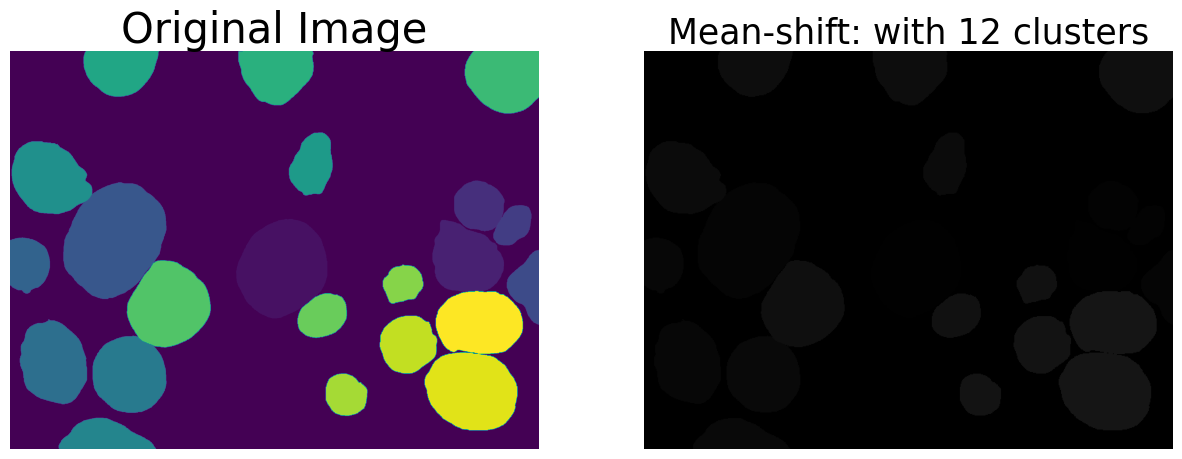

In [230]:
# Ricostruzione immagine e visualizzazione
res = cluster_centers[labels].reshape(w, h, c)

# Creazione di una mappa dei cluster (etichette reshape per ogni pixel)
label_image = labels.reshape(w, h)

# Identificazione dei bordi dei cluster
contours = np.zeros((w, h), dtype=np.uint8)  # Creazione immagine per contorni
for i in range(n_clusters_):
    cluster_mask = (label_image == i).astype(np.uint8)  # Maschera per il cluster i
    edges = cv2.Canny(cluster_mask, threshold1=0, threshold2=1)  # Trova bordi
    contours = cv2.bitwise_or(contours, edges)  # Sovrapponi contorni

# Sovrapposizione dei bordi bianchi sull'immagine segmentata
res_with_contours = res.copy()
res_with_contours[contours > 0] = [255, 255, 255]  # Bordi in bianco

# Visualizzazione dei risultati
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(imgcopy)
plt.title('Original Image', fontsize=30)
plt.axis('off')

#plt.subplot(122)
#plt.imshow(res)
#plt.title(f'Mean-shift cluster with {n_clusters_} clusters')
#plt.axis('off')

plt.subplot(122)
plt.imshow(res)
plt.title(f'Mean-shift: with {n_clusters_} clusters', fontsize=25)
plt.axis('off')

plt.show()